In [1]:
import matplotlib.pyplot as plt
from openbb import obb
import pyfinlib


In [2]:
aapl = obb.equity.price.historical(symbol='AAPL', provider='yfinance')

In [3]:
data = [i.open for i in aapl.results]

In [5]:
VaR_historical = pyfinlib.risk.value_at_risk.varcovar(data, 0.05)
VaR_historical_10 = pyfinlib.risk.value_at_risk.varcovar(data, 0.1)
VaR_historical, VaR_historical_10

(-0.03652672098724097, -0.028472401464066877)

In [6]:
returns = pyfinlib.util.rates_of_change(data)

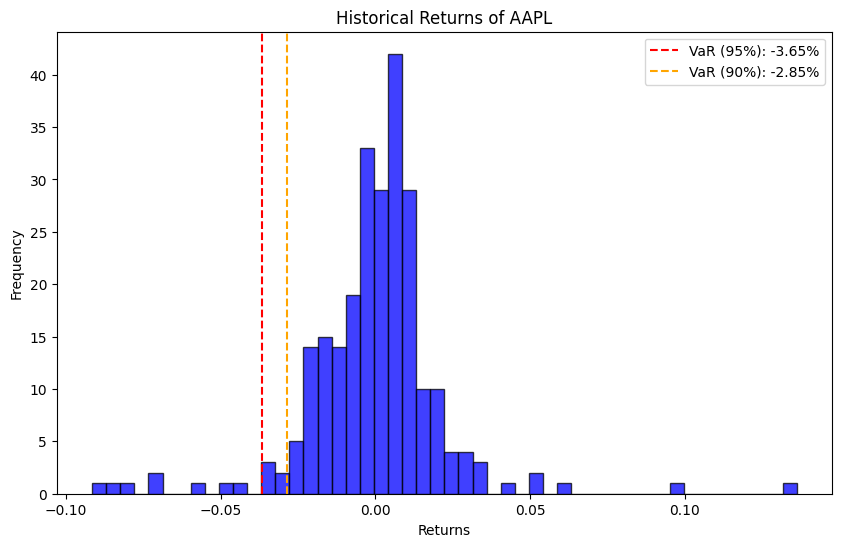

In [7]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='orange', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.title('Historical Returns of AAPL')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()